- Yaromir Kapustin
- 23.11.2022
- v0.1

#### Описание:
Один из ведущих розничных магазинов в США, Walmart, хотел бы точно прогнозировать продажи и спрос. Существуют определенные события и праздники, которые влияют на продажи в каждый день. Имеются данные о продажах в 45 магазинах Walmart. Бизнес сталкивается с проблемой непредвиденного спроса и иногда не хватает запасов из-за неправильного алгоритма машинного обучения. Идеальный алгоритм машинного обучения будет точно предсказывать спрос и учитывать такие факторы, как экономические условия, включая ИПЦ, индекс безработицы и т.д.

Walmart проводит несколько рекламных акций по уценке товаров в течение года. Эти уценки предшествуют важным праздникам, четыре крупнейших из которых - Суперкубок, День труда, День благодарения и Рождество. Недели, включающие эти праздники, имеют в пять раз больший вес при оценке, чем непраздничные недели. Часть проблемы, возникающей в этом конкурсе, заключается в моделировании влияния уценок на эти праздничные недели при отсутствии полных/идеальных исторических данных. Имеются исторические данные о продажах для 45 магазинов Walmart, расположенных в разных регионах.

#### Цель:
Понять набор данных и очистить его (если требуется).
Построить регрессионные модели для прогнозирования продаж по одному и нескольким признакам.
Также оцените модели и сравните их соответствующие показатели, такие как R2, RMSE и т.д.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.metrics  import f1_score,accuracy_score
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('Walmart.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
df['Date'] = pd.to_datetime(df.Date)

df['Weekday'] = df['Date'].dt.weekday
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

df = df.drop(['Date'], axis=1)

C:\conda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\conda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\conda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\conda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_arr

In [29]:
#Округлял значения для графиков
#df['Temperature'] = df['Temperature'].round(decimals = 0)
#df['Fuel_Price'] = df['Fuel_Price'].round(decimals = 0)
#df['CPI'] = df['CPI'].round(decimals = 0)
#df['Unemployment'] = df['Unemployment'].round(decimals = 0)

In [5]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekday,Year,Month
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,2010,5
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,2010,12
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2010,2
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2010,2
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,2010,5
...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,4,2012,9
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,3,2012,5
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,0,2012,12
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,4,2012,10


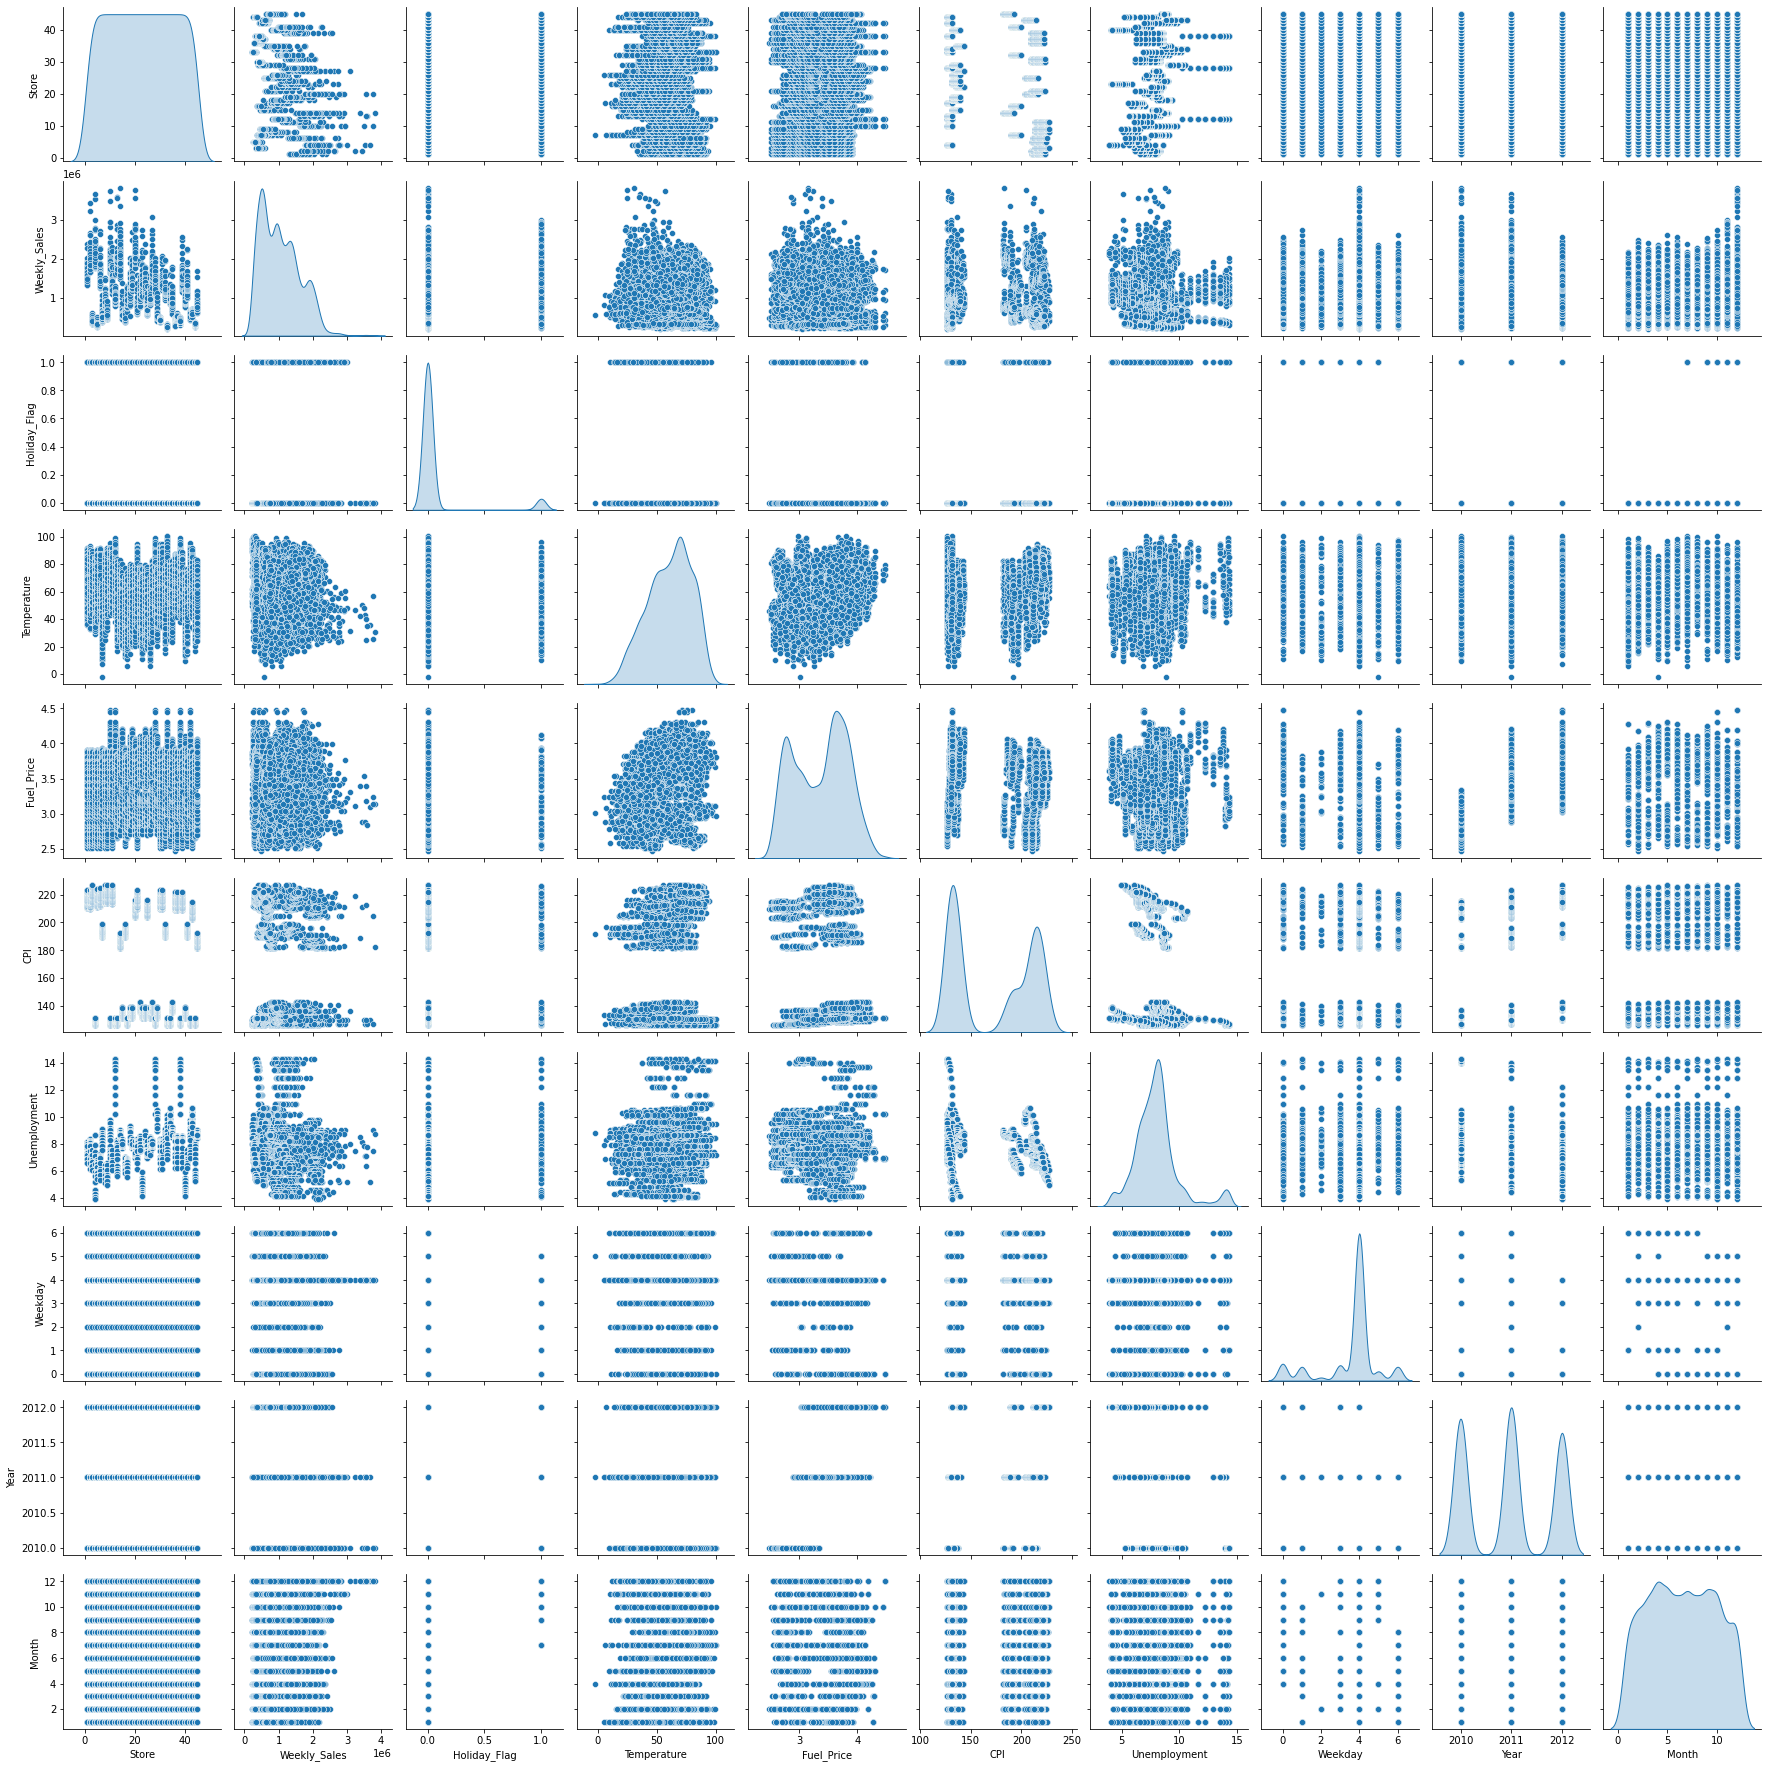

In [31]:
#нормального распределения нигде нет
sns.pairplot(data=df, diag_kind='kde')

<AxesSubplot:xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

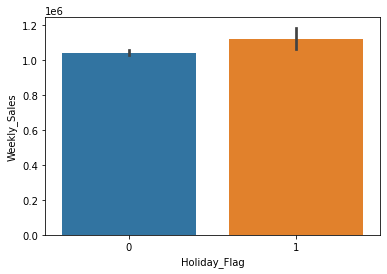

In [8]:
sns.barplot(data=df, x="Holiday_Flag", y="Weekly_Sales")

<AxesSubplot:xlabel='Temperature', ylabel='Weekly_Sales'>

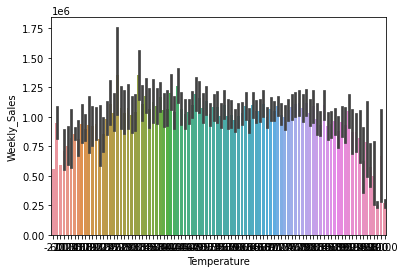

In [9]:
sns.barplot(data=df, x="Temperature", y="Weekly_Sales")

<AxesSubplot:xlabel='Fuel_Price', ylabel='Weekly_Sales'>

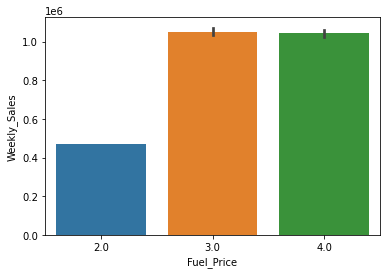

In [10]:
sns.barplot(data=df, x="Fuel_Price", y="Weekly_Sales")

<AxesSubplot:xlabel='CPI', ylabel='Weekly_Sales'>

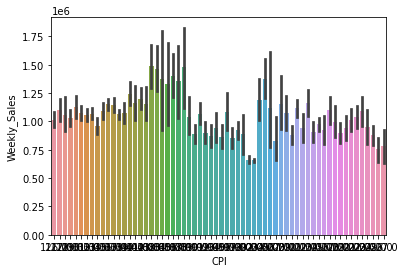

In [11]:
sns.barplot(data=df, x="CPI", y="Weekly_Sales")

<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

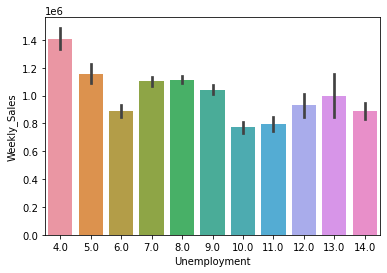

In [12]:
sns.barplot(data=df, x="Unemployment", y="Weekly_Sales")

<AxesSubplot:xlabel='Weekday', ylabel='Weekly_Sales'>

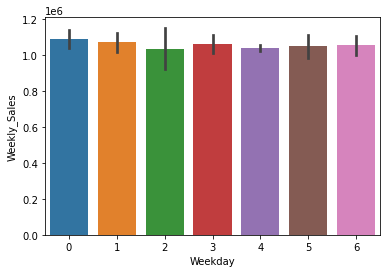

In [13]:
sns.barplot(data=df, x="Weekday", y="Weekly_Sales")

<AxesSubplot:xlabel='Month', ylabel='Weekly_Sales'>

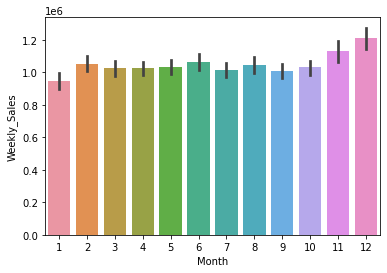

In [14]:
sns.barplot(data=df, x="Month", y="Weekly_Sales")

## Наблюдения из данных
1. В праздничные дни продаж немного больше
2. В очень холодные и очень жаркие дни продаж заметно меньше
3. При низких ценах на топливо продаж существенно меньше
4. Низкая безработица увеличивает продажи, высокая - уменьшает
5. От дня недели продажи не зависят
6. В ноябре и декабре продаж больше, в январь мало
7. По ипц продажи коррелируют волнообразно

In [6]:
df = pd.concat([df, 
                      pd.get_dummies(df['Month'], prefix="Month"),
                      pd.get_dummies(df['Weekday'], prefix="Weekday"),
                      pd.get_dummies(df['Year'], prefix="Year"),
                      pd.get_dummies(df['Store'], prefix="Store")],
                     axis=1)

df.drop(['Month','Weekday','Year', 'Store'], axis=1, inplace=True)

In [7]:
df

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month_1,Month_2,Month_3,Month_4,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,1643690.90,0,42.31,2.572,211.096358,8.106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1641957.44,1,38.51,2.548,211.242170,8.106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1611968.17,0,39.93,2.514,211.289143,8.106,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1409727.59,0,46.63,2.561,211.319643,8.106,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1554806.68,0,46.50,2.625,211.350143,8.106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,713173.95,0,64.88,3.997,192.013558,8.684,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6431,733455.07,0,64.89,3.985,192.170412,8.667,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6432,734464.36,0,54.47,4.000,192.327265,8.667,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6433,718125.53,0,56.47,3.969,192.330854,8.667,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
y = df.Weekly_Sales
X = df.drop('Weekly_Sales', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# LinearRegression

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
pred = model.predict(X_test)

In [39]:
print(mean_absolute_error(y_test, pred))
print(r2_score(y_test, pred))
print(mean_squared_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))

94528.05672384775
0.9273286942915303
23234516533.3453
152428.72607663326


# CatBoostRegressor

In [49]:
model = CatBoostRegressor(depth = 6, iterations = 1000, learning_rate = 0.1)
model.fit(X_train, y_train)

0:	learn: 543581.8957561	total: 2.79ms	remaining: 2.79s
1:	learn: 522658.7819645	total: 5.6ms	remaining: 2.79s
2:	learn: 504740.3442850	total: 8.13ms	remaining: 2.7s
3:	learn: 494039.9210564	total: 10.5ms	remaining: 2.61s
4:	learn: 481013.0700284	total: 12.8ms	remaining: 2.55s
5:	learn: 470709.9885952	total: 15.1ms	remaining: 2.51s
6:	learn: 461860.9059552	total: 17.4ms	remaining: 2.47s
7:	learn: 450775.8504551	total: 19.9ms	remaining: 2.47s
8:	learn: 442021.5909536	total: 22.2ms	remaining: 2.44s
9:	learn: 433532.9508104	total: 24.5ms	remaining: 2.42s
10:	learn: 424708.8913802	total: 26.8ms	remaining: 2.41s
11:	learn: 416168.7604247	total: 29.2ms	remaining: 2.4s
12:	learn: 409090.4108944	total: 31.4ms	remaining: 2.38s
13:	learn: 402062.1874178	total: 33.7ms	remaining: 2.37s
14:	learn: 395416.1870401	total: 36ms	remaining: 2.36s
15:	learn: 389465.9695045	total: 38.2ms	remaining: 2.35s
16:	learn: 383795.6242247	total: 40.7ms	remaining: 2.35s
17:	learn: 377859.9177352	total: 43.2ms	remain

148:	learn: 127270.4373522	total: 355ms	remaining: 2.03s
149:	learn: 126782.1266950	total: 358ms	remaining: 2.03s
150:	learn: 125979.6763450	total: 360ms	remaining: 2.02s
151:	learn: 125275.9684686	total: 363ms	remaining: 2.02s
152:	learn: 124876.9342925	total: 365ms	remaining: 2.02s
153:	learn: 124417.4710794	total: 368ms	remaining: 2.02s
154:	learn: 123966.8288103	total: 371ms	remaining: 2.02s
155:	learn: 123377.3286769	total: 373ms	remaining: 2.02s
156:	learn: 122565.6592801	total: 376ms	remaining: 2.02s
157:	learn: 122091.9399868	total: 379ms	remaining: 2.02s
158:	learn: 121439.4921323	total: 381ms	remaining: 2.02s
159:	learn: 121131.4839534	total: 384ms	remaining: 2.02s
160:	learn: 120777.7166745	total: 387ms	remaining: 2.01s
161:	learn: 120363.0578422	total: 389ms	remaining: 2.01s
162:	learn: 119580.2604697	total: 391ms	remaining: 2.01s
163:	learn: 119072.5823945	total: 394ms	remaining: 2.01s
164:	learn: 118684.2653738	total: 396ms	remaining: 2s
165:	learn: 118143.0363796	total: 

294:	learn: 88108.8363220	total: 710ms	remaining: 1.7s
295:	learn: 87974.8602598	total: 713ms	remaining: 1.7s
296:	learn: 87814.5372021	total: 716ms	remaining: 1.69s
297:	learn: 87718.6929253	total: 718ms	remaining: 1.69s
298:	learn: 87597.4381434	total: 721ms	remaining: 1.69s
299:	learn: 87450.1288893	total: 724ms	remaining: 1.69s
300:	learn: 87306.5839970	total: 726ms	remaining: 1.69s
301:	learn: 87199.5548638	total: 729ms	remaining: 1.68s
302:	learn: 87064.7374003	total: 731ms	remaining: 1.68s
303:	learn: 86931.0319993	total: 733ms	remaining: 1.68s
304:	learn: 86802.4752129	total: 736ms	remaining: 1.68s
305:	learn: 86640.4228230	total: 738ms	remaining: 1.67s
306:	learn: 86536.1314706	total: 741ms	remaining: 1.67s
307:	learn: 86417.7350871	total: 743ms	remaining: 1.67s
308:	learn: 86268.7061443	total: 745ms	remaining: 1.67s
309:	learn: 86184.3920071	total: 748ms	remaining: 1.66s
310:	learn: 86062.9687793	total: 750ms	remaining: 1.66s
311:	learn: 85960.8542755	total: 753ms	remaining: 

511:	learn: 66728.3087062	total: 1.25s	remaining: 1.19s
512:	learn: 66669.0529059	total: 1.25s	remaining: 1.19s
513:	learn: 66587.4433312	total: 1.25s	remaining: 1.18s
514:	learn: 66549.7307440	total: 1.25s	remaining: 1.18s
515:	learn: 66488.9075835	total: 1.26s	remaining: 1.18s
516:	learn: 66433.1618352	total: 1.26s	remaining: 1.18s
517:	learn: 66365.3300019	total: 1.26s	remaining: 1.18s
518:	learn: 66307.5315172	total: 1.26s	remaining: 1.17s
519:	learn: 66257.1596530	total: 1.27s	remaining: 1.17s
520:	learn: 66157.4960721	total: 1.27s	remaining: 1.17s
521:	learn: 66097.9247665	total: 1.27s	remaining: 1.17s
522:	learn: 66041.9162032	total: 1.28s	remaining: 1.16s
523:	learn: 65966.8426146	total: 1.28s	remaining: 1.16s
524:	learn: 65903.6029520	total: 1.28s	remaining: 1.16s
525:	learn: 65852.1958061	total: 1.28s	remaining: 1.16s
526:	learn: 65757.8990582	total: 1.29s	remaining: 1.16s
527:	learn: 65699.8679560	total: 1.29s	remaining: 1.15s
528:	learn: 65646.9186004	total: 1.29s	remaining

720:	learn: 55994.2202353	total: 1.78s	remaining: 688ms
721:	learn: 55949.7278279	total: 1.78s	remaining: 686ms
722:	learn: 55923.3188708	total: 1.78s	remaining: 683ms
723:	learn: 55858.0821552	total: 1.79s	remaining: 681ms
724:	learn: 55836.4776103	total: 1.79s	remaining: 679ms
725:	learn: 55789.0649141	total: 1.79s	remaining: 676ms
726:	learn: 55757.5002808	total: 1.79s	remaining: 674ms
727:	learn: 55714.8319518	total: 1.8s	remaining: 671ms
728:	learn: 55677.0158980	total: 1.8s	remaining: 669ms
729:	learn: 55638.0698162	total: 1.8s	remaining: 667ms
730:	learn: 55584.3582895	total: 1.8s	remaining: 664ms
731:	learn: 55538.9168187	total: 1.81s	remaining: 662ms
732:	learn: 55506.4577057	total: 1.81s	remaining: 659ms
733:	learn: 55451.5187495	total: 1.81s	remaining: 657ms
734:	learn: 55398.7059585	total: 1.81s	remaining: 654ms
735:	learn: 55329.6178898	total: 1.82s	remaining: 652ms
736:	learn: 55276.2500485	total: 1.82s	remaining: 649ms
737:	learn: 55251.0901999	total: 1.82s	remaining: 64

932:	learn: 48895.2104825	total: 2.29s	remaining: 165ms
933:	learn: 48879.7484649	total: 2.3s	remaining: 162ms
934:	learn: 48805.0896631	total: 2.3s	remaining: 160ms
935:	learn: 48760.2069580	total: 2.3s	remaining: 157ms
936:	learn: 48715.7413700	total: 2.31s	remaining: 155ms
937:	learn: 48686.2619779	total: 2.31s	remaining: 153ms
938:	learn: 48655.2635121	total: 2.31s	remaining: 150ms
939:	learn: 48635.8398297	total: 2.31s	remaining: 148ms
940:	learn: 48614.6299993	total: 2.31s	remaining: 145ms
941:	learn: 48602.2201190	total: 2.32s	remaining: 143ms
942:	learn: 48566.6819279	total: 2.32s	remaining: 140ms
943:	learn: 48541.5885222	total: 2.32s	remaining: 138ms
944:	learn: 48512.0007266	total: 2.32s	remaining: 135ms
945:	learn: 48476.0994401	total: 2.33s	remaining: 133ms
946:	learn: 48446.3998267	total: 2.33s	remaining: 130ms
947:	learn: 48409.0690736	total: 2.33s	remaining: 128ms
948:	learn: 48376.6471736	total: 2.33s	remaining: 125ms
949:	learn: 48357.7650093	total: 2.34s	remaining: 1

In [48]:
parameters = {'depth'         : [2, 4, 6, 8, 10],
              'learning_rate' : [0.01, 0.05, 0.1, 0.5, 1],
              'iterations'    : [30, 50, 100, 500, 1000]
             }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 5, n_jobs=-1)
grid.fit(X_train, y_train)

grid.best_params_

0:	learn: 543581.8957561	total: 2.59ms	remaining: 2.59s
1:	learn: 522658.7819645	total: 4.97ms	remaining: 2.48s
2:	learn: 504740.3442850	total: 7.32ms	remaining: 2.43s
3:	learn: 494039.9210564	total: 9.64ms	remaining: 2.4s
4:	learn: 481013.0700284	total: 12ms	remaining: 2.38s
5:	learn: 470709.9885952	total: 14.3ms	remaining: 2.36s
6:	learn: 461860.9059552	total: 16.5ms	remaining: 2.35s
7:	learn: 450775.8504551	total: 18.9ms	remaining: 2.34s
8:	learn: 442021.5909536	total: 21.3ms	remaining: 2.34s
9:	learn: 433532.9508104	total: 23.6ms	remaining: 2.34s
10:	learn: 424708.8913802	total: 25.9ms	remaining: 2.33s
11:	learn: 416168.7604247	total: 28.2ms	remaining: 2.32s
12:	learn: 409090.4108944	total: 30.5ms	remaining: 2.32s
13:	learn: 402062.1874178	total: 32.9ms	remaining: 2.31s
14:	learn: 395416.1870401	total: 35.2ms	remaining: 2.31s
15:	learn: 389465.9695045	total: 37.5ms	remaining: 2.31s
16:	learn: 383795.6242247	total: 39.9ms	remaining: 2.3s
17:	learn: 377859.9177352	total: 42.2ms	remai

212:	learn: 103564.0571896	total: 528ms	remaining: 1.95s
213:	learn: 103251.9329961	total: 530ms	remaining: 1.95s
214:	learn: 103035.6849816	total: 533ms	remaining: 1.95s
215:	learn: 102773.5372438	total: 536ms	remaining: 1.94s
216:	learn: 102480.9825487	total: 538ms	remaining: 1.94s
217:	learn: 102109.3198220	total: 541ms	remaining: 1.94s
218:	learn: 101846.7818071	total: 543ms	remaining: 1.94s
219:	learn: 101622.9807321	total: 546ms	remaining: 1.94s
220:	learn: 101467.2311208	total: 548ms	remaining: 1.93s
221:	learn: 101293.7037388	total: 551ms	remaining: 1.93s
222:	learn: 100937.5992470	total: 553ms	remaining: 1.93s
223:	learn: 100666.3277111	total: 556ms	remaining: 1.93s
224:	learn: 100497.2015388	total: 558ms	remaining: 1.92s
225:	learn: 100365.9175918	total: 561ms	remaining: 1.92s
226:	learn: 100243.3513836	total: 563ms	remaining: 1.92s
227:	learn: 100020.3579648	total: 565ms	remaining: 1.91s
228:	learn: 99812.9862360	total: 568ms	remaining: 1.91s
229:	learn: 99669.3329659	total:

432:	learn: 72665.3079108	total: 1.06s	remaining: 1.39s
433:	learn: 72568.8259212	total: 1.07s	remaining: 1.39s
434:	learn: 72499.3910945	total: 1.07s	remaining: 1.39s
435:	learn: 72407.4186828	total: 1.07s	remaining: 1.39s
436:	learn: 72344.5853338	total: 1.07s	remaining: 1.38s
437:	learn: 72268.5473895	total: 1.08s	remaining: 1.38s
438:	learn: 72143.7076455	total: 1.08s	remaining: 1.38s
439:	learn: 72088.4913413	total: 1.08s	remaining: 1.38s
440:	learn: 72036.4582674	total: 1.08s	remaining: 1.37s
441:	learn: 71939.3734743	total: 1.09s	remaining: 1.37s
442:	learn: 71874.6469600	total: 1.09s	remaining: 1.37s
443:	learn: 71742.3617806	total: 1.09s	remaining: 1.37s
444:	learn: 71649.1546121	total: 1.09s	remaining: 1.36s
445:	learn: 71588.2002245	total: 1.09s	remaining: 1.36s
446:	learn: 71502.4456168	total: 1.1s	remaining: 1.36s
447:	learn: 71442.4598358	total: 1.1s	remaining: 1.36s
448:	learn: 71383.9736438	total: 1.1s	remaining: 1.35s
449:	learn: 71291.6866243	total: 1.1s	remaining: 1.

581:	learn: 62556.6653662	total: 1.42s	remaining: 1.02s
582:	learn: 62503.3560022	total: 1.43s	remaining: 1.02s
583:	learn: 62436.5925543	total: 1.43s	remaining: 1.02s
584:	learn: 62358.8395576	total: 1.43s	remaining: 1.01s
585:	learn: 62288.4084821	total: 1.43s	remaining: 1.01s
586:	learn: 62237.3515994	total: 1.44s	remaining: 1.01s
587:	learn: 62187.8986436	total: 1.44s	remaining: 1.01s
588:	learn: 62141.2122615	total: 1.44s	remaining: 1s
589:	learn: 62068.2985834	total: 1.44s	remaining: 1s
590:	learn: 62024.6990414	total: 1.45s	remaining: 1s
591:	learn: 61982.0755982	total: 1.45s	remaining: 998ms
592:	learn: 61930.0809320	total: 1.45s	remaining: 996ms
593:	learn: 61874.8149607	total: 1.45s	remaining: 993ms
594:	learn: 61837.2174091	total: 1.46s	remaining: 991ms
595:	learn: 61783.6397804	total: 1.46s	remaining: 988ms
596:	learn: 61738.1289836	total: 1.46s	remaining: 986ms
597:	learn: 61669.8968536	total: 1.46s	remaining: 983ms
598:	learn: 61621.2150436	total: 1.47s	remaining: 981ms
5

801:	learn: 52999.6738357	total: 1.96s	remaining: 484ms
802:	learn: 52981.8905992	total: 1.96s	remaining: 481ms
803:	learn: 52945.7568639	total: 1.96s	remaining: 479ms
804:	learn: 52921.8297532	total: 1.97s	remaining: 476ms
805:	learn: 52896.9175835	total: 1.97s	remaining: 474ms
806:	learn: 52871.4007915	total: 1.97s	remaining: 472ms
807:	learn: 52812.3734737	total: 1.97s	remaining: 469ms
808:	learn: 52784.6099884	total: 1.98s	remaining: 467ms
809:	learn: 52761.7201871	total: 1.98s	remaining: 464ms
810:	learn: 52729.1525746	total: 1.98s	remaining: 462ms
811:	learn: 52684.9024465	total: 1.98s	remaining: 459ms
812:	learn: 52648.2918908	total: 1.99s	remaining: 457ms
813:	learn: 52599.6160786	total: 1.99s	remaining: 454ms
814:	learn: 52565.0428433	total: 1.99s	remaining: 452ms
815:	learn: 52543.8543461	total: 1.99s	remaining: 450ms
816:	learn: 52503.9576217	total: 2s	remaining: 447ms
817:	learn: 52464.7741895	total: 2s	remaining: 445ms
818:	learn: 52438.0757004	total: 2s	remaining: 442ms
8

{'depth': 6, 'iterations': 1000, 'learning_rate': 0.1}

In [50]:
pred = model.predict(X_test)

In [51]:
print(mean_absolute_error(y_test, pred))
print(r2_score(y_test, pred))
print(mean_squared_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))

56003.274532817515
0.968894652882375
9945021557.465576
99724.72891648077


# XGBRegressor

In [54]:
model = XGBRegressor(colsample_bytree = 0.8,
 gamma = 0.3,
 max_depth = 2,
 min_child_weight = 7,
 n_estimators = 1000,
 subsample = 0.8)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [53]:
parameters = {'max_depth': [2, 4, 6],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.2, 0.6, 0.8],
           'min_child_weight': [3, 5, 7],
           'gamma': [0.3, 0.5, 0.7],
           'subsample': [0.4, 0.6, 0.8]
             }

grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 5, n_jobs=-1)
grid.fit(X_train, y_train)

grid.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.3,
 'max_depth': 2,
 'min_child_weight': 7,
 'n_estimators': 1000,
 'subsample': 0.8}

In [55]:
print(mean_absolute_error(y_test, pred))
print(r2_score(y_test, pred))
print(mean_squared_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))

63884.19382233946
0.9610682565518931
12447282018.652
111567.38779164814
